## Assignment-5-1-Multilinear_Regression

### Problem Statement

#### Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.

#### R&D Spend -- Research and devolop spend in the past few years
#### Administration -- spend on administration in the past few years
#### Marketing Spend -- spend on Marketing in the past few years
#### State -- states from which data is collected
#### Profit  -- profit of each state in the past few years

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

### Import Data

In [2]:
startups=pd.read_csv('50_Startups.csv')
startups.rename(columns = {'Marketing Spend':'Marketing_spent','R&D Spend':'RnD_spent'}, inplace = True)
startups.drop('State',axis=1,inplace=True)

In [3]:
startups.head()

,RnD_spent,Administration,Marketing_spent,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD_spent        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_spent  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
startups.describe()

,RnD_spent,Administration,Marketing_spent,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### EDA

#### Correlation matrix

In [6]:
startups.corr()

,RnD_spent,Administration,Marketing_spent,Profit
RnD_spent,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spent,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#### Pairplot (Scatter & Histogram)

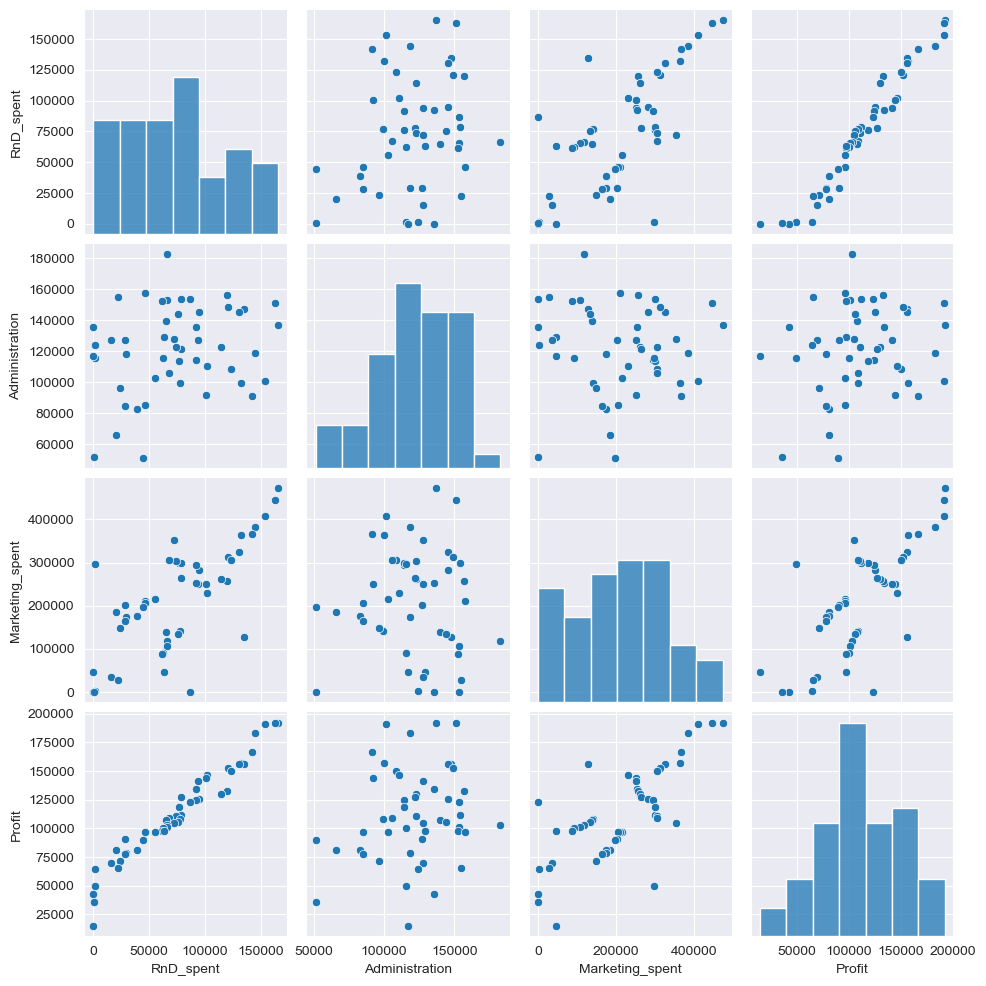

In [35]:
sns.set_style('darkgrid')
sns.pairplot(startups)

### Prepare OLS Model

In [42]:
lm_1=smf.ols('Profit~RnD_spent+Administration+Marketing_spent',data=startups).fit()

#### r2 ,r2_adj ,RMSE & AIC values of ols_model

In [108]:
print('r2 =', lm_1.rsquared,'\n','r2_adj = ',lm_1.rsquared_adj,'\n','AIC =',lm_1.aic)
mse1=(np.sum((lm_1.resid**2)))/len(startups)
RMSE_1=np.sqrt(mse1)
print('RMSE_1 =',RMSE_1)

r2 = 0.9507459940683246 
 r2_adj =  0.9475337762901719 
 AIC = 1058.7714985998055
RMSE_1 = 8855.344489015142


In [49]:
lm_1.tvalues

Intercept           7.626218
RnD_spent          17.846374
Administration     -0.525507
Marketing_spent     1.655077
dtype: float64

In [50]:
lm_1.pvalues

Intercept          1.057379e-09
RnD_spent          2.634968e-22
Administration     6.017551e-01
Marketing_spent    1.047168e-01
dtype: float64

In [51]:
lm_1.params

Intercept          50122.192990
RnD_spent              0.805715
Administration        -0.026816
Marketing_spent        0.027228
dtype: float64

In [109]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        12:19:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_spent           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spent     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### r2 value of .95 is found. Let's do further analysis

### Test of VIF

In [48]:
r2_RnD_spent       =smf.ols('RnD_spent~Administration+Marketing_spent',data=startups).fit().rsquared
r2_Administration  =smf.ols('Administration~RnD_spent+Marketing_spent',data=startups).fit().rsquared
r2_Marketing_spent =smf.ols('Marketing_spent~RnD_spent+Administration',data=startups).fit().rsquared

vif_RnD_spent            =1/(1-r2_RnD_spent)
vif_Administration =1/(1-r2_Administration )
vif_Marketing_spent=1/(1-r2_Marketing_spent)

VIF =pd.DataFrame({'Variables':['RnD_spent','Administration','Marketing_spent'],'VIF':
                   [vif_RnD_spent,vif_Administration,vif_Marketing_spent]})
VIF

,Variables,VIF
0,RnD_spent,2.468903
1,Administration,1.175091
2,Marketing_spent,2.326773


#### VIF values are <3 , let's proceed

### Test for Normality of Residuals (qqplot &kdeplot)

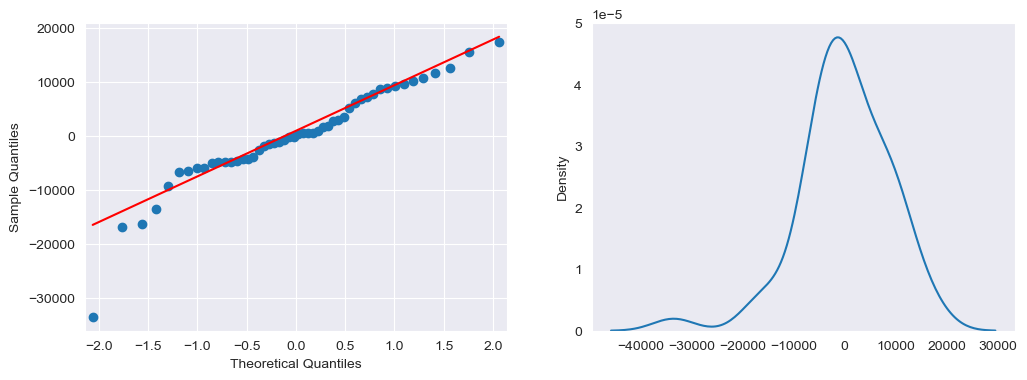

In [52]:
fig, axes=plt.subplots(figsize=(12,4),ncols=2)
sm.qqplot(lm_1.resid,line='q',ax=axes[0])
sns.kdeplot(lm_1.resid,ax=axes[1])
plt.grid()

#### Residual are not quite following normal distribution, it has left spread

### Test for Homosedasticity

,t_stats,pvalue_t,F_stats,pvalue_F
0,10.087175,0.006451,3.959439,0.013465


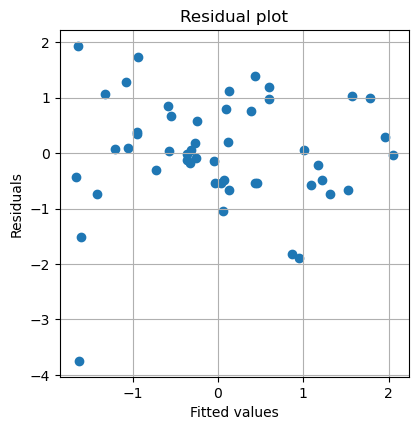

In [29]:
# function to return standardised residual values(tvalues)
def std_residuals (resid):
    return (resid-resid.mean())/resid.std()
plt.subplots(figsize=(4.5,4.5))
plt.scatter(std_residuals(lm_1.fittedvalues),std_residuals(lm_1.resid))
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()

#Bruesch-Pagan test for homosedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
X=startups[['RnD_spent','Administration','Marketing_spent']]
het_breuschpagan(lm_1.resid,exog_het=X)
bp_result=het_breuschpagan(lm_1.resid,exog_het=X)
bp_result=pd.DataFrame({'t_stats':bp_result[0],'pvalue_t':bp_result[1],'F_stats':bp_result[2],'pvalue_F':bp_result[3]},index=[0])
bp_result

####  Homoscedasticity refers to the assumption that the variability of the residuals is constant across different levels of the predictors. In our  residual plot, we see a relatively consistent spread of points along the horizontal axis
#### Can find some outliers which stay away from the spread of residuals

### Residuals vs Regressors (sm.graphics.plot_regress_exog)

eval_env: 1


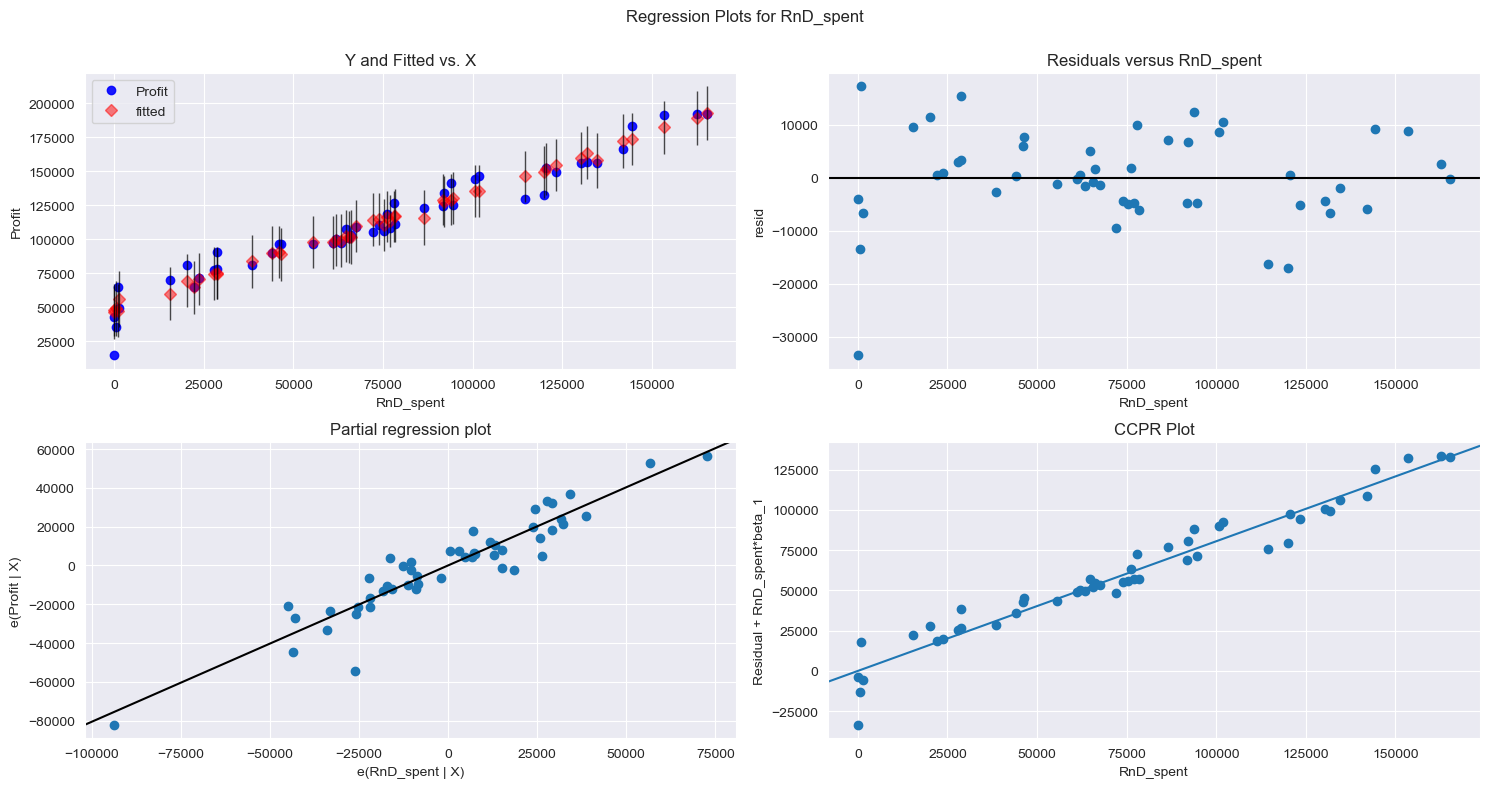

In [53]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lm_1, "RnD_spent", fig=fig)
sns.set_style('darkgrid')
plt.show()

eval_env: 1


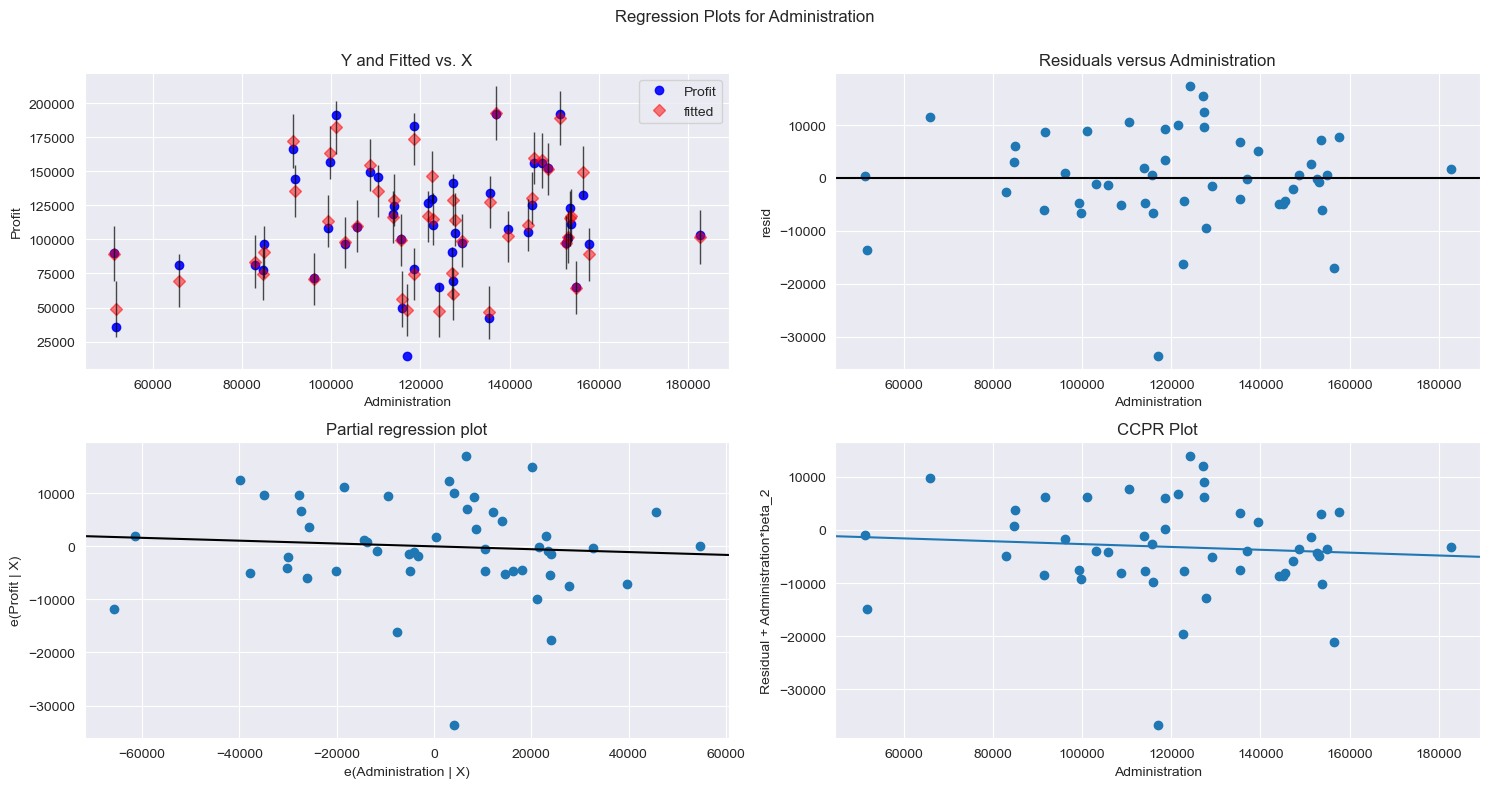

In [54]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lm_1, "Administration", fig=fig)
plt.show()

eval_env: 1


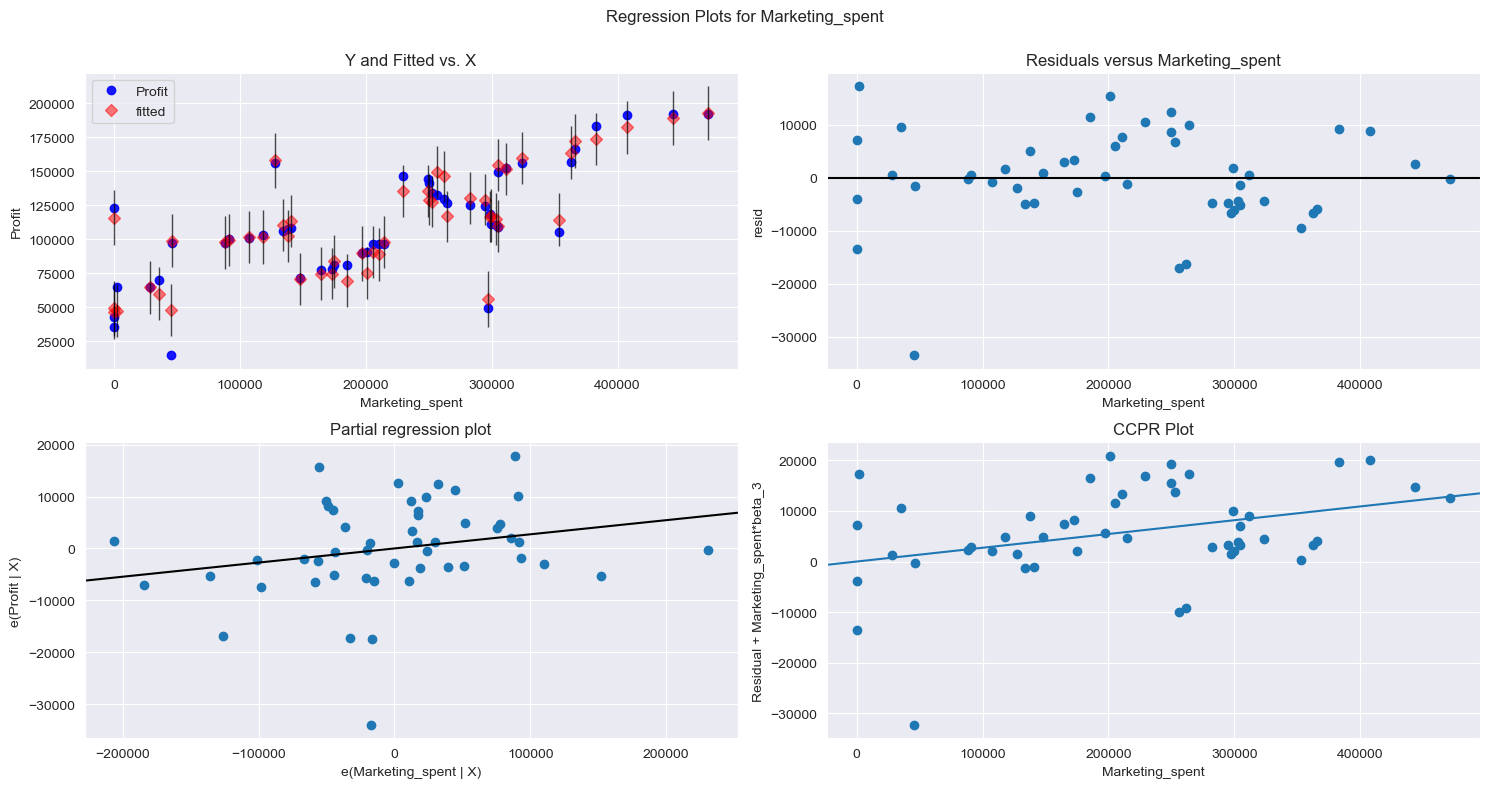

In [55]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(lm_1, "Marketing_spent", fig=fig)
plt.show()

#### None of the regressors violates the linearity with the residulas excessively

### Cooks distance & Detection of Influencers and Outliers

cooks_max = 0.2880822927543267 
 raw_index = 49


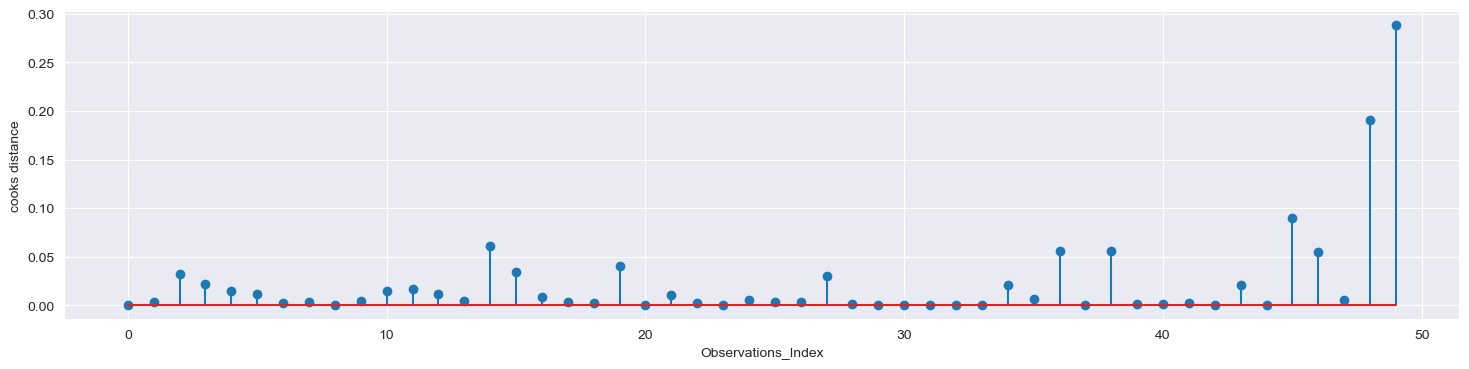

In [57]:
#cooks distance
influence_lm1=lm_1.get_influence()
(cooks,_)=influence_lm1.cooks_distance

#stemplot for cooks distance
plt.subplots(figsize=(18,4))
plt.xlabel('Observations_Index')
plt.ylabel('cooks distance')
plt.stem(np.arange(len(startups)),cooks)
print('cooks_max =',cooks.max(),'\n','raw_index =',np.argmax(cooks))

#### Its clear from the above plot that there are some rows which inflence the model extensively even if maximum cooks distance <1

### Influece plot

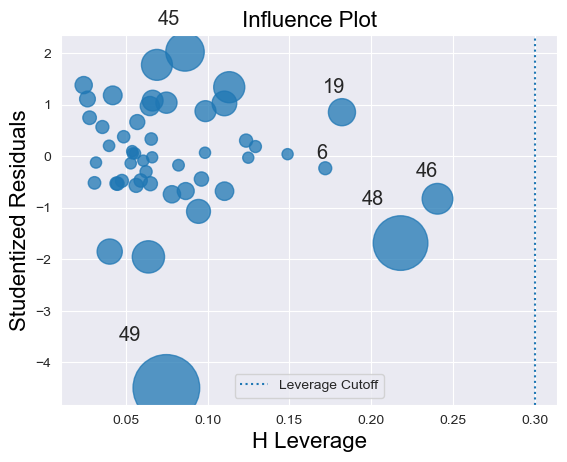

lev_cutoff = 0.3


In [58]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(lm_1)

# leverage cutoff = (k+1)/n n-->observations ,k-->independent variables
n=startups.shape[0]
k=startups.shape[1]
lev_cutoff =3*(k+1)/n
plt.axvline(x=lev_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.show()
print('lev_cutoff =',3*(k+1)/n)

#### From Influence plot and cooks distance calculation, it is evident that raw index 48 & 49 are influencers

### Re-building moel by dropping influencers

In [59]:
df1=startups
startups_1=df1.drop([48,49])
startups_1=startups_1.reset_index().drop(['index'],axis=1)
lm_2=smf.ols('Profit~RnD_spent+Administration+Marketing_spent',data=startups_1).fit()

#### r2 ,r2_adj ,RMSE & AIC values of ols_model

In [112]:
print('r2 =', lm_2.rsquared,'\n','r2_adj = ',lm_2.rsquared_adj,'\n','AIC =',lm_2.aic)
mse2=(np.sum((lm_2.resid**2)))/len(startups_1)
RMSE_2=np.sqrt(mse2)
print('RMSE_2 =',RMSE_2)

r2 = 0.9626766170294073 
 r2_adj =  0.960131840917776 
 AIC = 994.6690439260116
RMSE_2 = 7036.484810004803


#### We can observe significant reduction in RMSE and improvement in r2 value

In [63]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           2.03e-31
Time:                        11:27:59   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RnD_spent           0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_spent     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Cooks distance

cooks_max = 0.13829133994334533 
 raw_index = 46


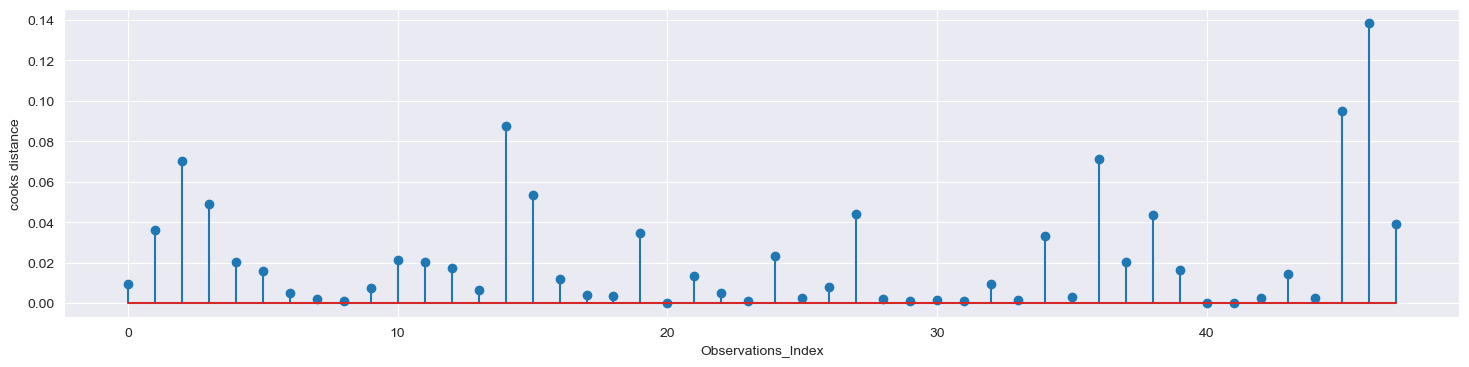

In [64]:
#cooks distance
influence_2=lm_2.get_influence()
(cooks,_)=influence_2.cooks_distance

#stemplot for cooks distance
plt.subplots(figsize=(18,4))
plt.xlabel('Observations_Index')
plt.ylabel('cooks distance')
plt.stem(np.arange(len(startups_1)),cooks)
print('cooks_max =',cooks.max(),'\n','raw_index =',np.argmax(cooks))

#### Maximum cooks distance <.15 , which is impressive ..Let's try some transformation and try to improve our model further



### Transformations
#### Square-root transformation

In [113]:
# On Regressors
lm_3=smf.ols('Profit~np.sqrt(RnD_spent)+np.sqrt(Administration)+np.sqrt(Marketing_spent)',data=startups_1).fit()
print('r2 =', lm_3.rsquared,'\n','r2_adj = ',lm_3.rsquared_adj,'\n','AIC =',lm_3.aic)
mse3=np.sum(lm_3.resid**2)/len(startups_1)
RMSE_3 =np.sqrt(mse3)
print('RMSE_3 =',RMSE_3)

r2 = 0.886560917498423 
 r2_adj =  0.8788264346005883 
 AIC = 1048.028049778501
RMSE_3 = 12267.2327843413


In [151]:
# On Both Regressing and Responding variable
y4=np.sqrt(startups_1.Profit)
lm_4=smf.ols('y4~np.sqrt(RnD_spent)+np.sqrt(Administration)+np.sqrt(Marketing_spent)',data=startups_1).fit()
print('r2 =', lm_4.rsquared,'\n','r2_adj = ',lm_4.rsquared_adj,'\n','AIC =',lm_4.aic)
mse4=np.sum((lm_4.fittedvalues**2-startups_1.Profit)**2)/len(startups_1)
RMSE_4=np.sqrt(mse4)
print('RMSE_4 =',RMSE_4)


r2 = 0.929309947934356 
 r2_adj =  0.924490171657153 
 AIC = 400.43849451268136
RMSE_4 = 9576.322505626904


In [152]:
# On Responding variable
lm_5=smf.ols('np.sqrt(Profit)~RnD_spent+Administration+Marketing_spent',data=startups_1).fit()
print('r2 =', lm_5.rsquared,'\n','r2_adj = ',lm_5.rsquared_adj,'\n','AIC =',lm_5.aic)
mse5=(np.sum((lm_5.fittedvalues**2-startups_1.Profit))**2)/len(startups_1)
RMSE_5=np.sqrt(mse5)
print('RMSE_4 =',RMSE_5)


r2 = 0.9562127399781583 
 r2_adj =  0.953227244976669 
 AIC = 377.4483209738213
RMSE_4 = 892.9793526994541


#### Box-cox Transformation

In [153]:
# On Responding variable
from scipy.stats import boxcox
lm_6=smf.ols('boxcox(Profit)[0]~RnD_spent+Administration+Marketing_spent',data=startups_1).fit()
print('r2 =', lm_6.rsquared,'\n','r2_adj = ',lm_6.rsquared_adj,'\n','AIC =',lm_6.aic,'\n','lambda_boxcox =',boxcox(startups_1.Profit)[1])

transformed_values, lambda_out = boxcox(startups_1.Profit)
# Inverse Box-Cox transformation
inverse_values = np.power((lambda_out * lm_6.fittedvalues) + 1, 1 / lambda_out)
lambda_boxcox =boxcox(startups_1.Profit)[1]
mse6=(np.sum((inverse_values-startups_1.Profit)**2)/len(startups_1))
RMSE_6=np.sqrt(mse6)
print('RMSE_6 =',RMSE_6)


r2 = 0.9581106418503536 
 r2_adj =  0.9552545492492412 
 AIC = 504.8513727813996 
 lambda_boxcox = 0.5565581270964365
RMSE_6 = 7096.383333917049


#### Reciprocal transformation

In [154]:
# On Response variable
from scipy.stats import boxcox
y_=1/startups_1.Profit
lm_7=smf.ols('y_~RnD_spent+Administration+Marketing_spent',data=startups_1).fit()
print('r2 =', lm_7.rsquared,'\n','r2_adj = ',lm_7.rsquared_adj,'\n','AIC =',lm_7.aic,'\n')
mse7=(np.sum(((1/lm_7.fittedvalues)-startups_1.Profit))**2)/len(startups_1)
RMSE_7=np.sqrt(mse7)
print('RMSE_7 =',RMSE_7)


r2 = 0.7848136117689541 
 r2_adj =  0.7701418125713828 
 AIC = -1131.5895801636361 

RMSE_7 = 31632.981789820602


### Comparison of Normality assumptions (qq-plot & kdeplot)

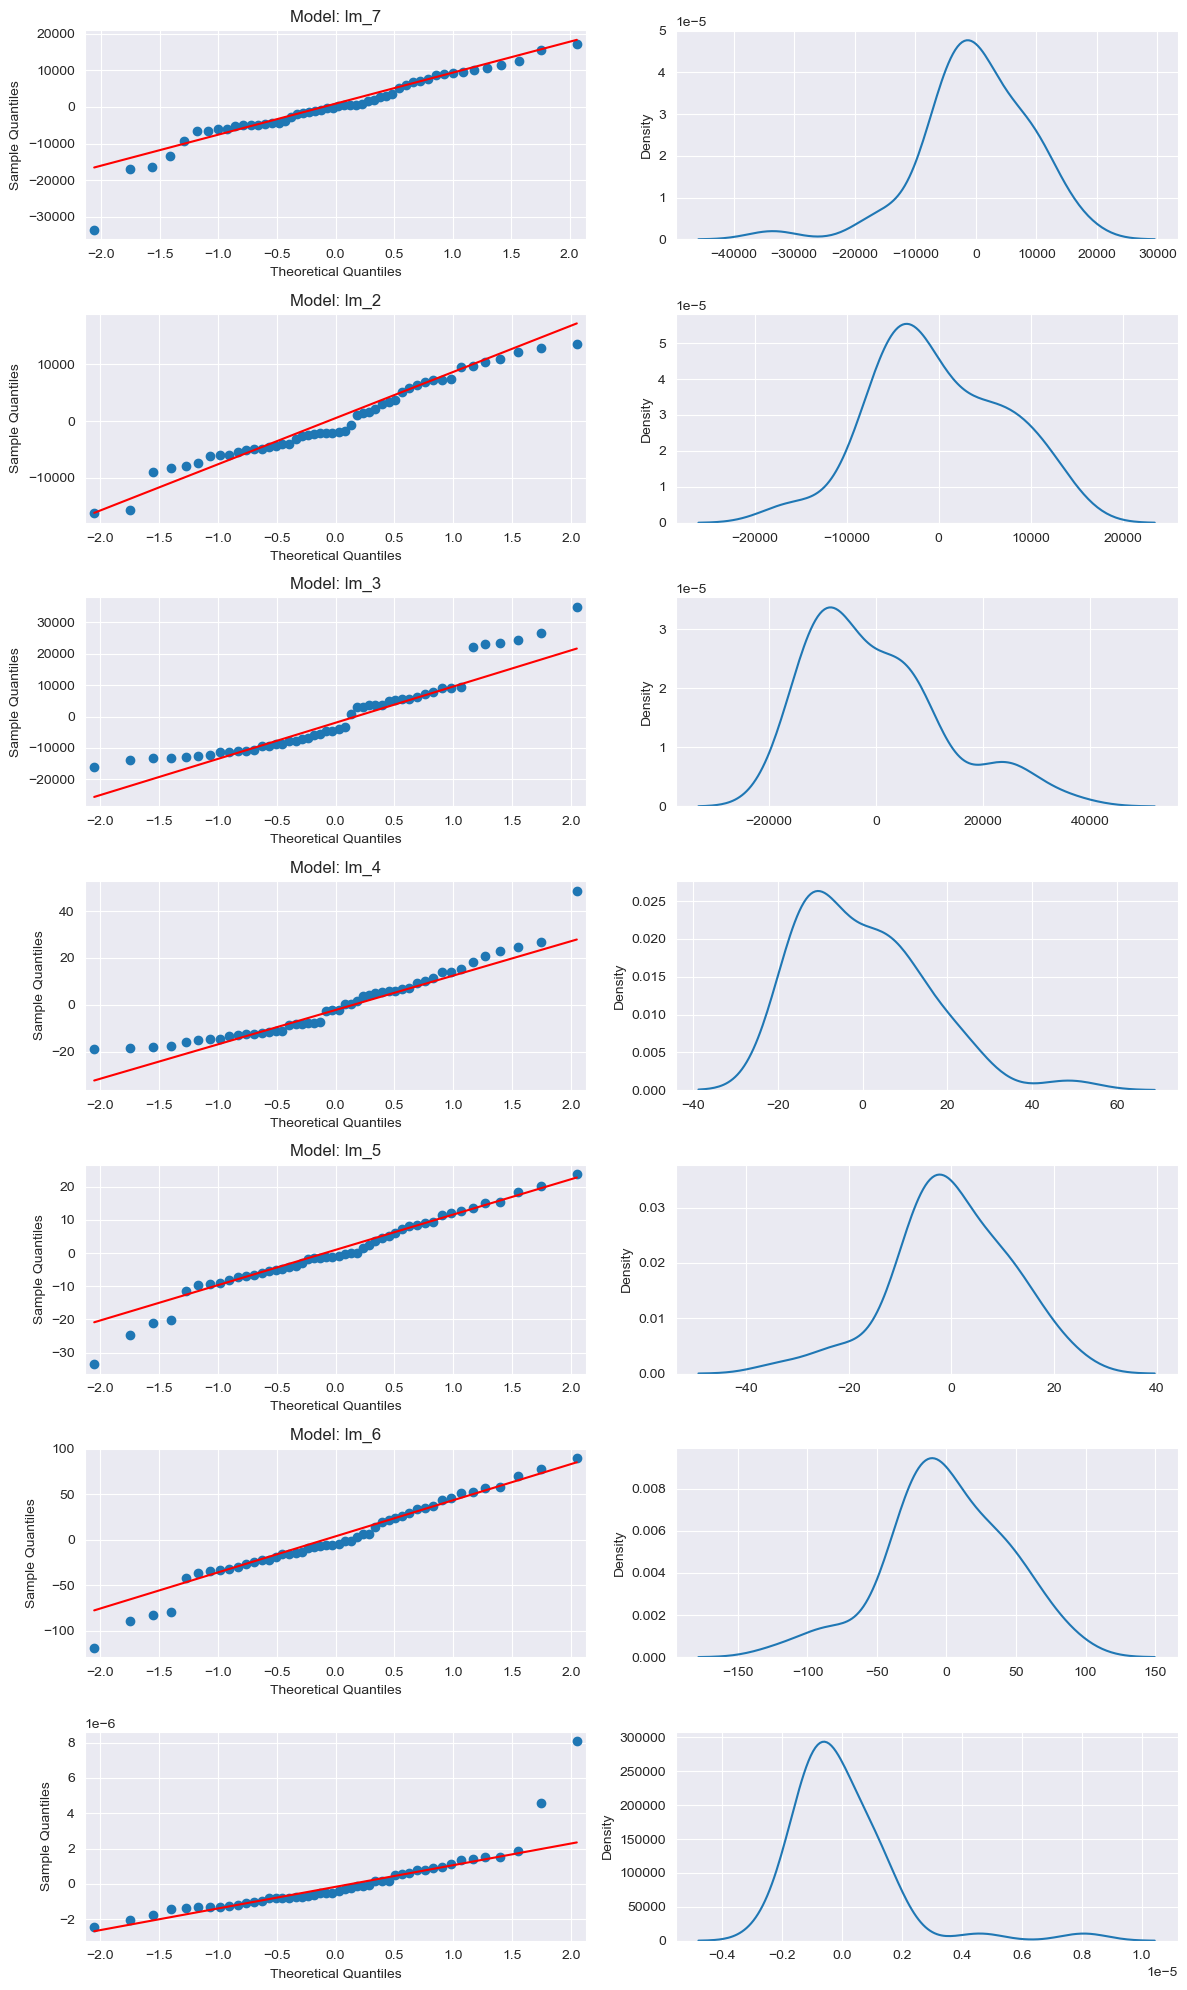

In [206]:
fig, axes=plt.subplots(figsize=(12,20),ncols=2,nrows=7)
plt.grid('darkgrid')

sm.qqplot(lm_1.resid,line='q',ax=axes[0,0])
sns.kdeplot(lm_1.resid,ax=axes[0,1])
axes[0,0].set_title('Model: lm_1')
sm.qqplot(lm_2.resid,line='q',ax=axes[1,0])
sns.kdeplot(lm_2.resid,ax=axes[1,1])
axes[1,0].set_title('Model: lm_2')
sm.qqplot(lm_3.resid,line='q',ax=axes[2,0])
sns.kdeplot(lm_3.resid,ax=axes[2,1])
axes[2,0].set_title('Model: lm_3')
sm.qqplot(lm_4.resid,line='q',ax=axes[3,0])
sns.kdeplot(lm_4.resid,ax=axes[3,1])
axes[3,0].set_title('Model: lm_4')
sm.qqplot(lm_5.resid,line='q',ax=axes[4,0])
sns.kdeplot(lm_5.resid,ax=axes[4,1])
axes[4,0].set_title('Model: lm_5')
sm.qqplot(lm_6.resid,line='q',ax=axes[5,0])
sns.kdeplot(lm_6.resid,ax=axes[5,1])
axes[5,0].set_title('Model: lm_6')
sm.qqplot(lm_7.resid,line='q',ax=axes[6,0])
sns.kdeplot(lm_7.resid,ax=axes[6,1])
axes[0,0].set_title('Model: lm_7')
plt.tight_layout()

#### Model lm_5 satisfies our normality assumptions better compared to other models

### Comparison of model parameters

In [221]:
par_={'Model':['lm_1','lm_2','lm_3','lm_4','lm_5','lm_6','lm_7'],
     'r2':[lm_1.rsquared,lm_2.rsquared,lm_3.rsquared,lm_4.rsquared,lm_5.rsquared,lm_6.rsquared,lm_7.rsquared],
      'r2_adj':[lm_1.rsquared_adj,lm_2.rsquared_adj,lm_3.rsquared_adj,lm_4.rsquared_adj,lm_5.rsquared_adj,lm_6.rsquared_adj,lm_7.rsquared_adj],
     'AIC':[lm_1.aic,lm_2.aic,lm_3.aic,lm_4.aic,lm_5.aic,lm_6.aic,lm_7.aic],
     'RMSE':[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7]}
par_=pd.DataFrame(par_)

def highlight_specific_row(row):
    return ['background-color: cyan' if (row.name == 4  ) else '' for _ in row]
par__= par_.style.apply(highlight_specific_row, axis=1)
par__

,Model,r2,r2_adj,AIC,RMSE
0,lm_1,0.950746,0.947534,1058.771499,8855.344489
1,lm_2,0.962677,0.960132,994.669044,7036.484810
2,lm_3,0.886561,0.878826,1048.028050,12267.232784
3,lm_4,0.929310,0.924490,400.438495,9576.322506
4,lm_5,0.956213,0.953227,377.448321,892.979353
5,lm_6,0.958111,0.955255,504.851373,7096.383334
6,lm_7,0.784814,0.770142,-1131.589580,31632.981790


#### From different models lm_5 exhibits optimal measure of fit.Let's finalise our final model as lm_5

### Final Model

In [169]:
lm_final=lm_5 

### Model prediction

In [207]:
# let the data for prediction is
pred_data=pd.DataFrame({'RnD_spent':68000,"Administration":92000,"Marketing_spent":130000},index=[0])
pred_data

,RnD_spent,Administration,Marketing_spent
0,68000,92000,130000


In [210]:
predicted_profit=(lm_5.predict(pred_data))**2
predicted_profit

0    107105.354251
dtype: float64

### Conclusion 
#### The OLS model lm1 is chosen as the best model